# Learn NetworkX with Me

In [43]:
import pandas as pd
import networkx as nx
from random import sample
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [39]:
link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

## Explore different graphs

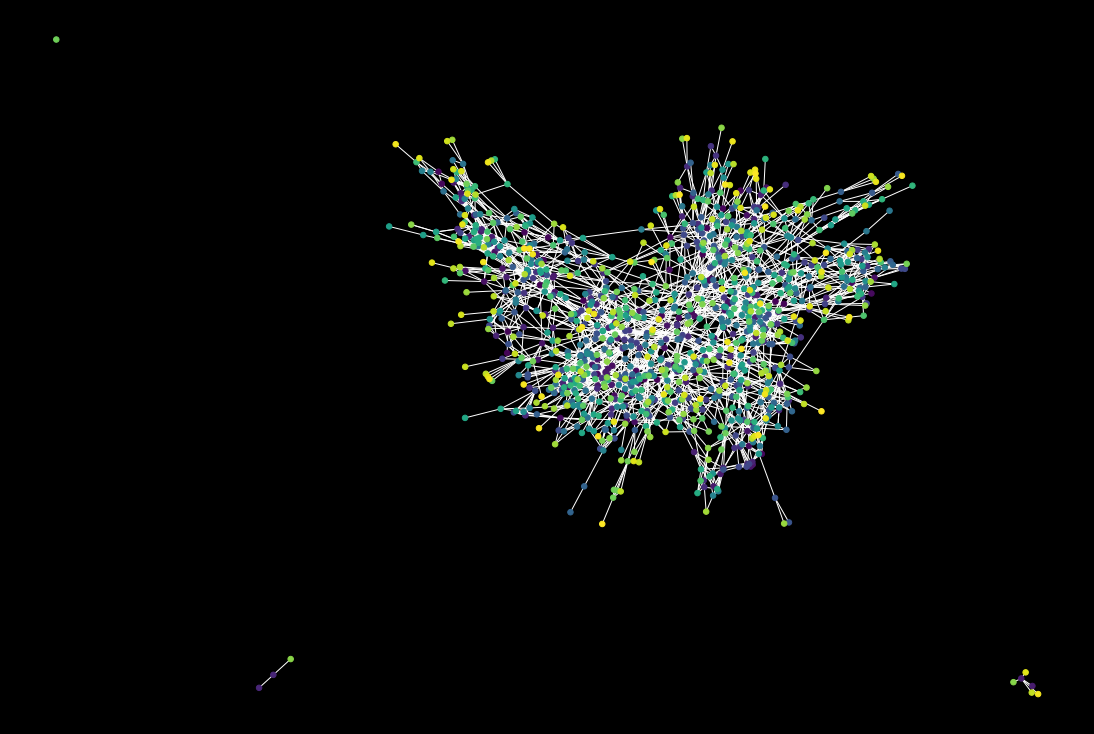

In [13]:
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('black')

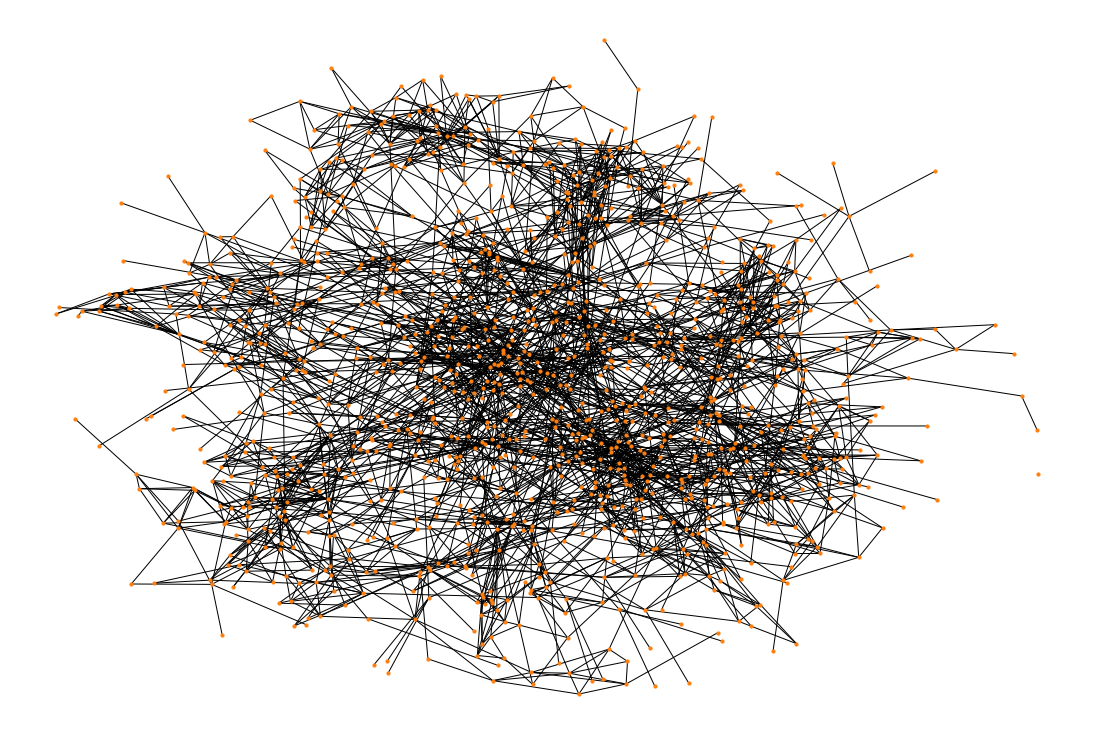

In [14]:
plt.figure(figsize=(15, 10))

k = 0.1
layout = nx.spring_layout(graph,
                          k=k)
nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

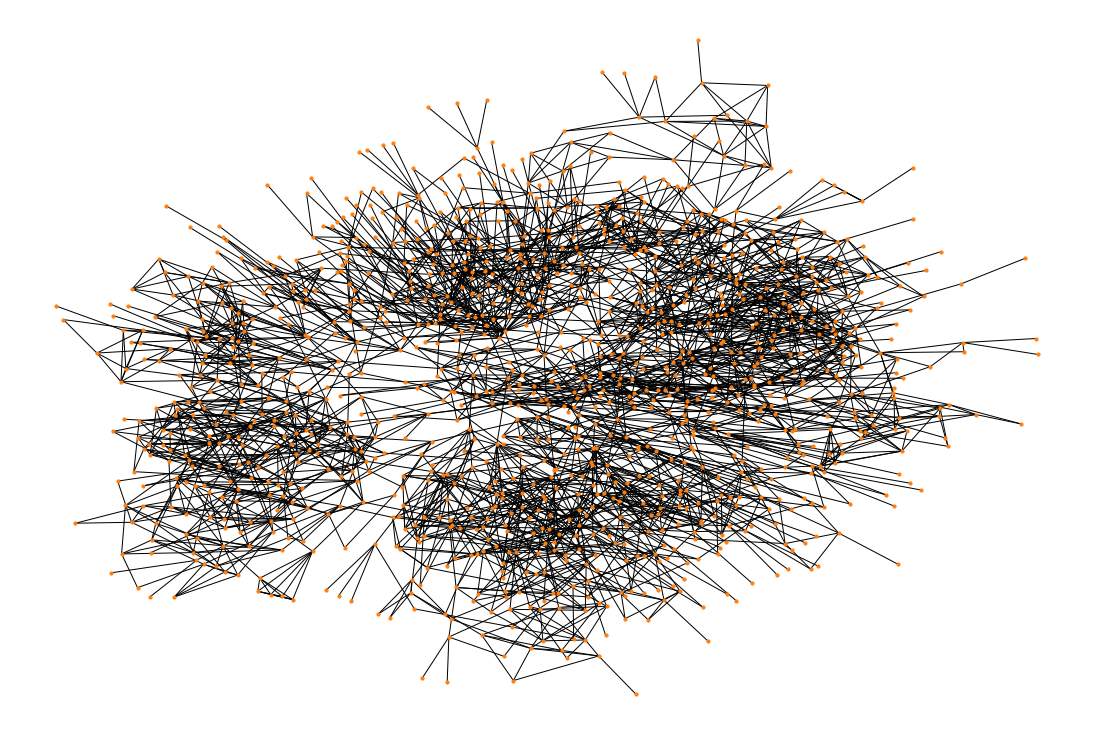

In [15]:
plt.figure(figsize=(15, 10))

layout = nx.kamada_kawai_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)


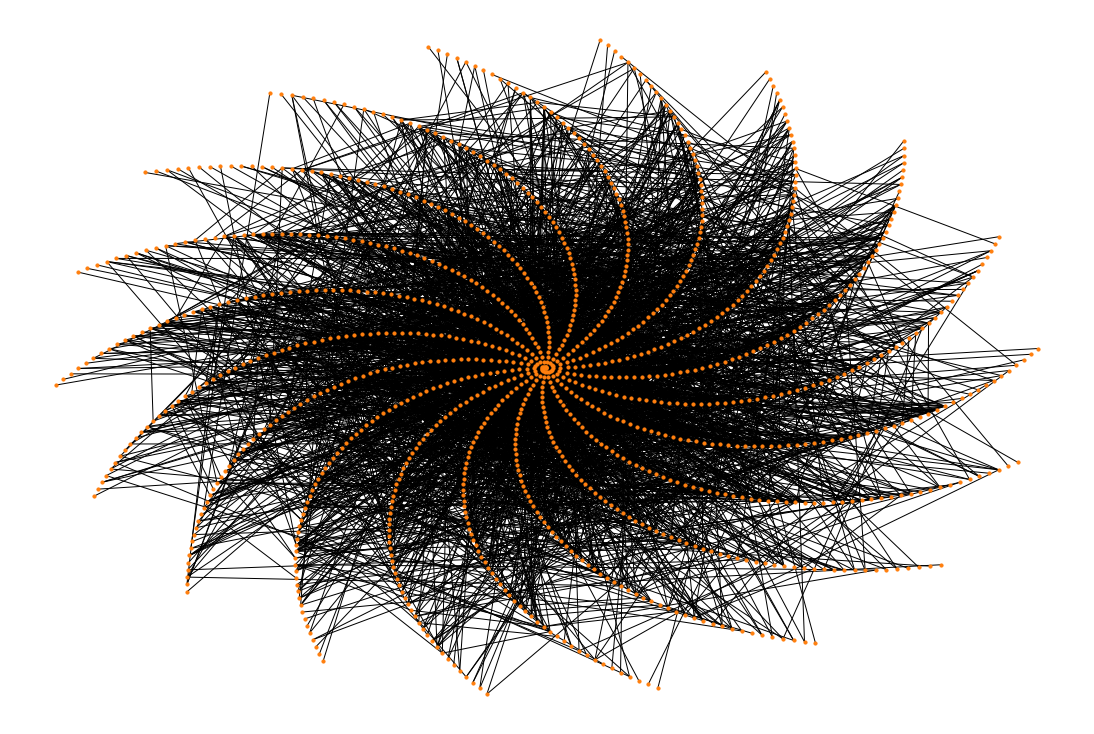

In [16]:
plt.figure(figsize=(15, 10))

layout = nx.spiral_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

## Centrality metrics 

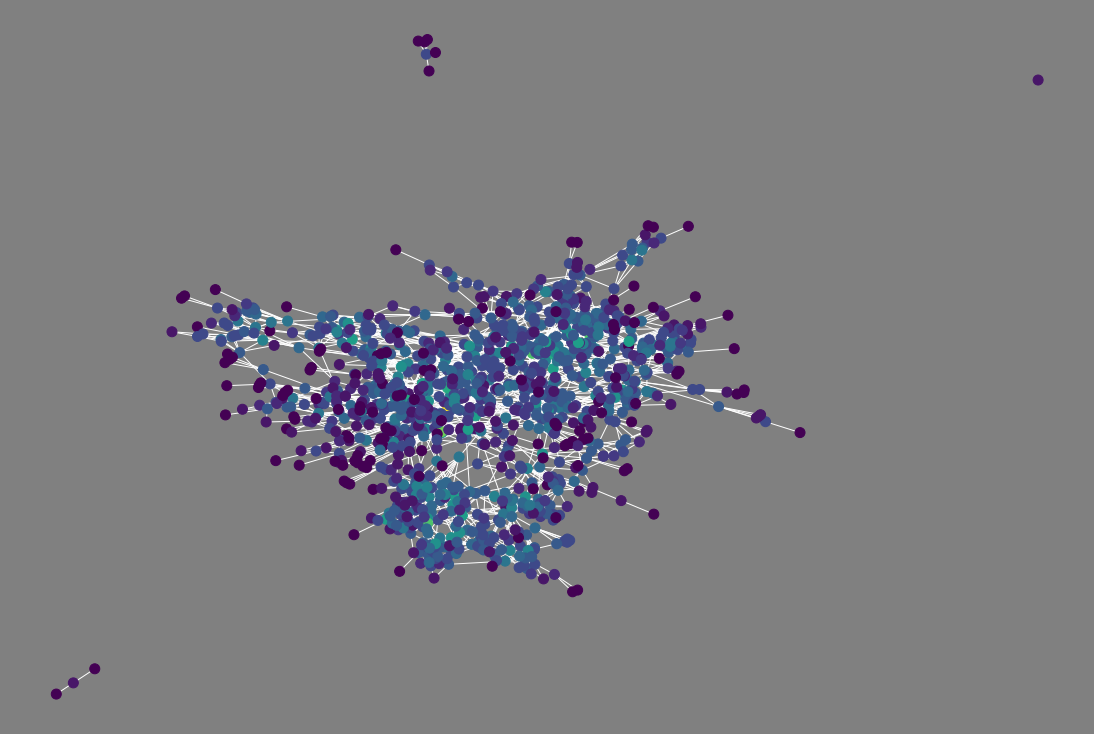

In [19]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.degree_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('gray')

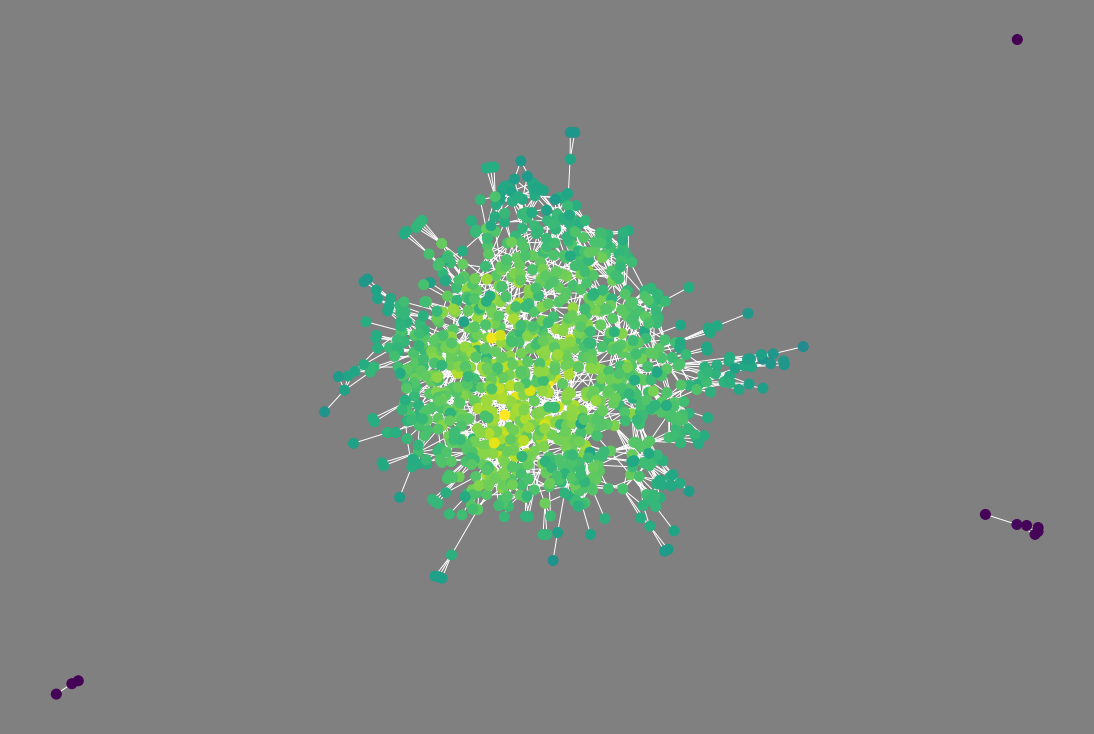

In [20]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('gray')

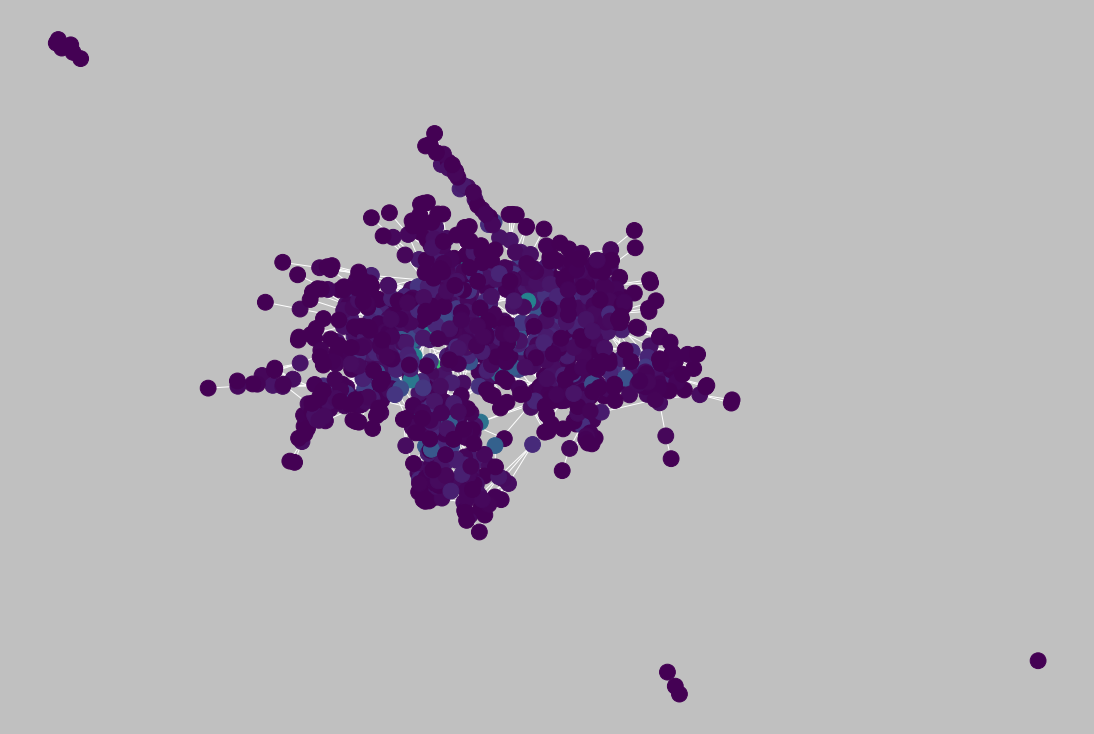

In [24]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('silver')

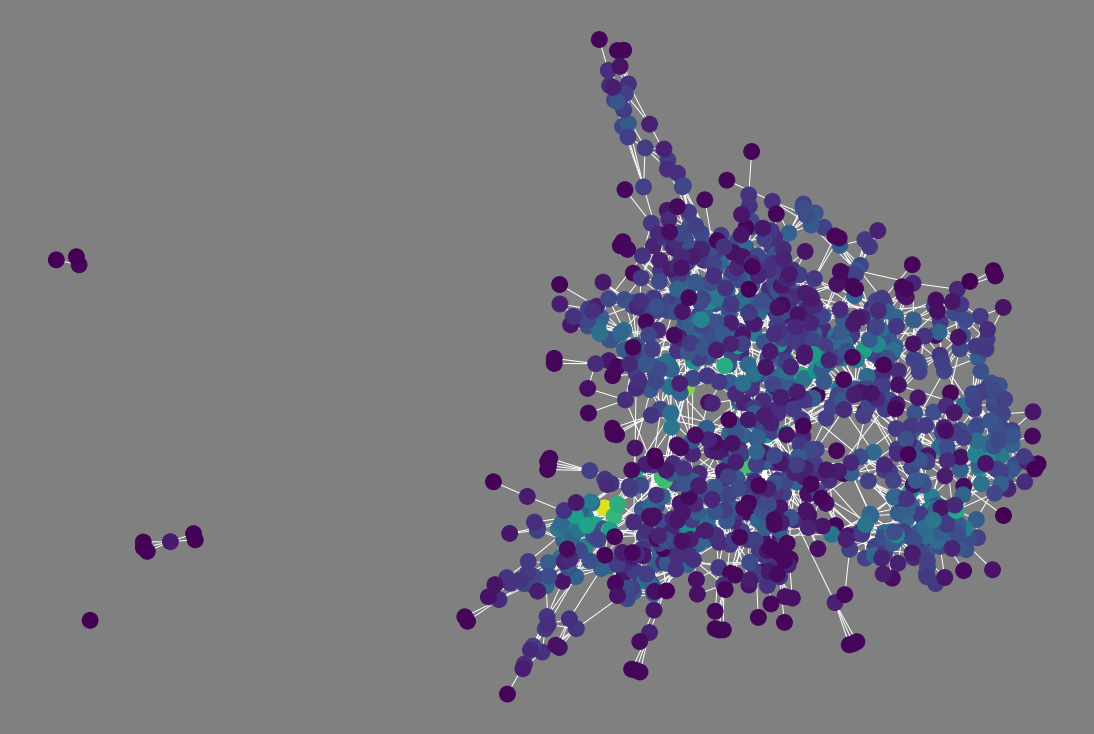

In [23]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('gray')

## Different type of graph

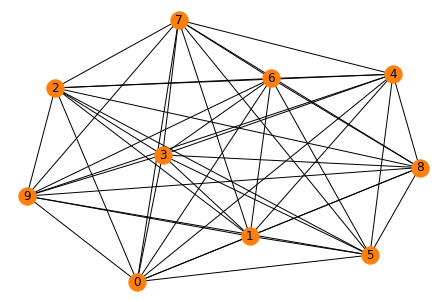

In [25]:
#complete graph
graph = nx.complete_graph(10)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

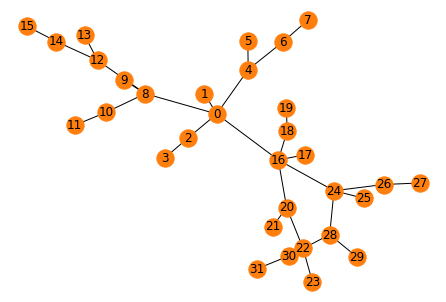

In [26]:
graph = nx.binomial_tree(5)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

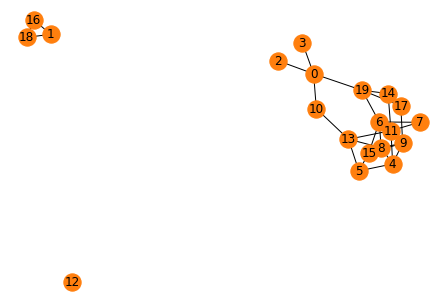

In [27]:
graph = nx.binomial_graph(20, 0.15)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

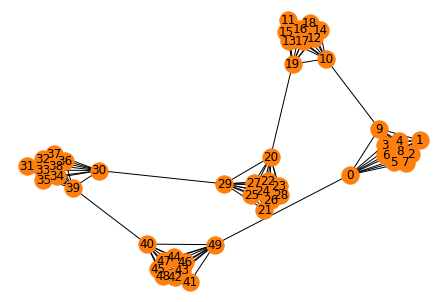

In [28]:
graph = nx.connected_caveman_graph(5, 10)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

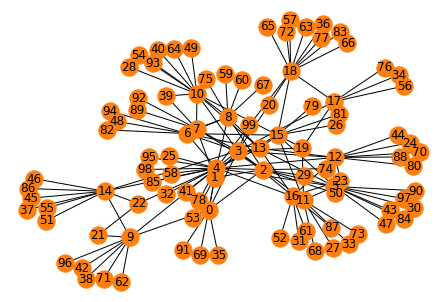

In [29]:
graph = nx.random_internet_as_graph(100)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

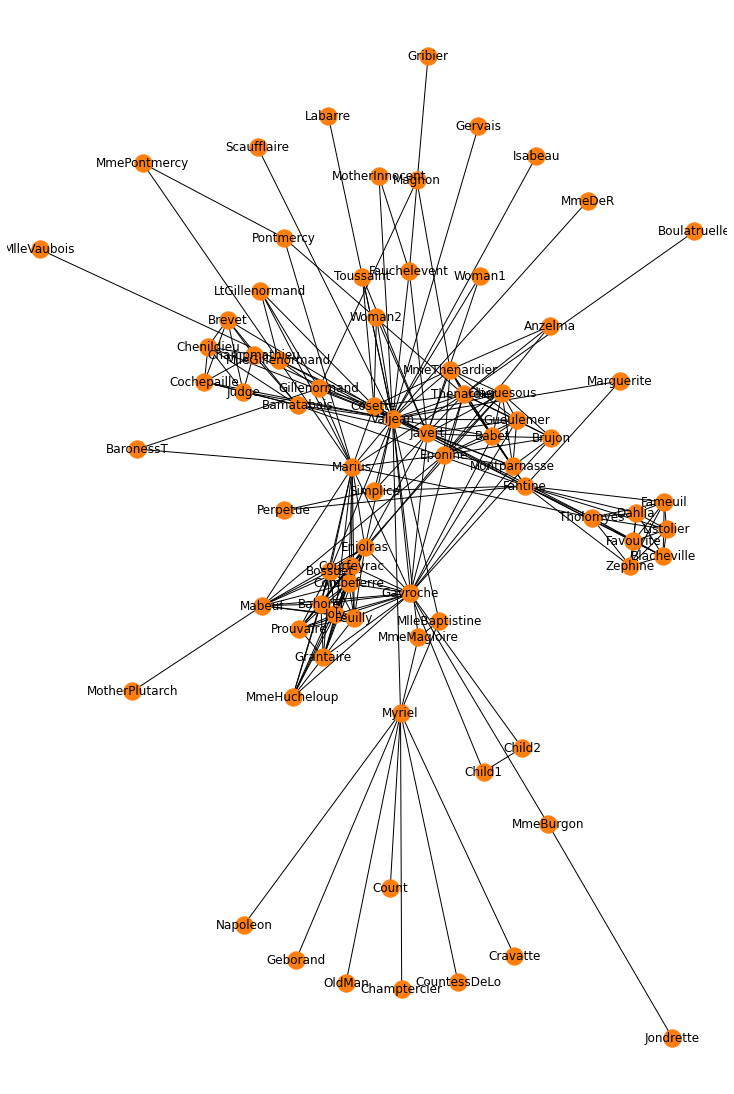

In [30]:
plt.figure(figsize=(10, 15))
graph = nx.les_miserables_graph()
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

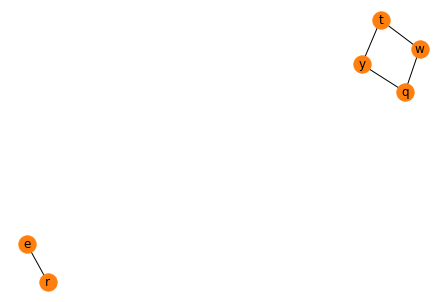

In [31]:
# Add and remove nodes and edges
graph = nx.Graph()
new_nodes =['q', 'w', 'e', 'r', 't', 'y']
new_edges = [('q', 'w'), ('e', 'r'),  ('t', 'y'),
             ('q', 'y'), ('w', 't')]
graph.add_nodes_from(new_nodes)
graph.add_edges_from(new_edges)

nx.draw(graph, 
        node_color='C1',
        with_labels=True)


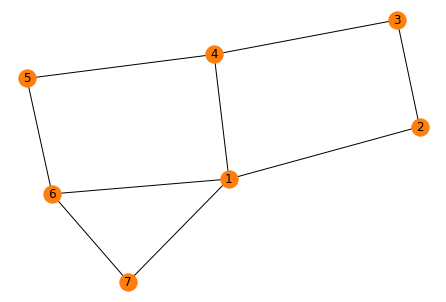

In [32]:
#Manipulate the nodes
graph = nx.Graph()
edges = [(1, 2), (2, 3), (3, 4),
         (4, 5), (5, 6), (6, 1),
         (1, 4), (1, 7), (6, 7)]
graph.add_edges_from(edges)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

In [33]:
graph.edges[1, 2]['weight'] = 2
print(graph.edges[1, 2])


{'weight': 2}


In [34]:
#edge weights
edge_weights = {edge: np.random.rand()
                for edge in graph.edges}

nx.set_edge_attributes(graph, edge_weights, 'weight')

#Node Size
node_sizes = {node: np.random.rand() * 300
              for node in graph.nodes}

nx.set_node_attributes(graph, node_sizes, 'size')

#Node Colors
node_colors = {node: np.random.rand()
              for node in graph.nodes}

nx.set_node_attributes(graph, node_colors, 'color')

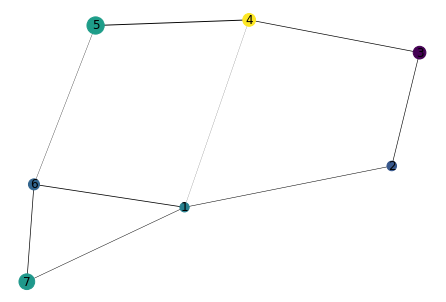

In [35]:
width = list(nx.get_edge_attributes(graph, 'weight').values())
node_size = list(nx.get_node_attributes(graph, 'size').values())
node_color = list(nx.get_node_attributes(graph, 'color').values())

nx.draw(graph, 
        width=width,
        node_size=node_size,
        node_color=node_color,
        with_labels=True)

In [36]:
nx.get_node_attributes(graph, 'size')

{1: 85.84454029152396,
 2: 91.13458982838675,
 3: 160.26187782244867,
 4: 162.39368695820855,
 5: 297.20520890784616,
 6: 121.37980534709686,
 7: 246.50650771377227}

## Explore the subgraphs

In [40]:
len(graph.nodes)

1193

In [41]:
len(graph.edges)

2947

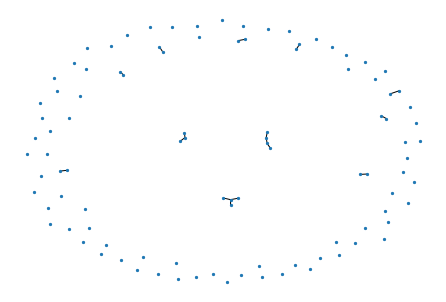

In [42]:
sampled_nodes = sample(graph.nodes, 100)
subgraph = graph.subgraph(sampled_nodes)
nx.draw(subgraph,
        node_size=5,
        with_labels=False)

In [44]:
nodes_school_id = nx.get_node_attributes(graph,
                                         'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [45]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [46]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [47]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

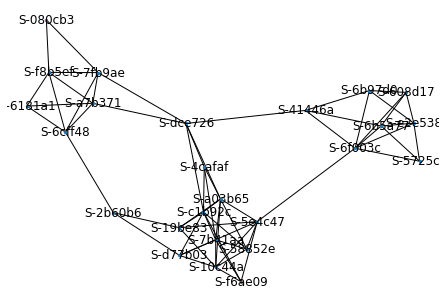

In [48]:
nx.draw(subgraphs[3],
        node_size=5,
        with_labels=True)